# **SVM & Naive bayes**

---
# ***Theoretical***

---



---





### 1. What is a Support Vector Machine (SVM)?

A Support Vector Machine is a supervised machine learning algorithm used for classification and regression tasks. It tries to find the optimal hyperplane that best separates the data into different classes.

### 2. What is the difference between Hard Margin and Soft Margin SVM?

Hard Margin SVM tries to separate data with a perfect margin (no errors), which only works for linearly separable data. Soft Margin SVM allows some misclassifications to find a better generalization for noisy or non-separable data.

### 3. What is the mathematical intuition behind SVM?

SVM aims to maximize the margin between the support vectors (closest data points to the hyperplane) while minimizing classification errors. It solves an optimization problem using Lagrange multipliers.

### 4. What is the role of Lagrange Multipliers in SVM?

Lagrange multipliers are used to convert the constrained optimization problem into a form that can be solved efficiently using the dual form.

### 5. What are Support Vectors in SVM?

Support vectors are the data points that lie closest to the decision boundary and are most important in defining the hyperplane.

### 6. What is a Support Vector Classifier (SVC)?

SVC is the classification implementation of SVM in scikit-learn that can use different kernels to separate data.

### 7. What is a Support Vector Regressor (SVR)?

SVR is the regression version of SVM, which tries to fit the data within a margin of tolerance.

### 8. What is the Kernel Trick in SVM?

The Kernel Trick allows SVM to operate in high-dimensional space without explicitly mapping the data, enabling it to find non-linear decision boundaries.

### 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?

- Linear Kernel: for linearly separable data.
- Polynomial Kernel: for curved boundaries.
- RBF Kernel: best for complex non-linear data.

### 10. What is the effect of the C parameter in SVM?

C controls the trade-off between margin size and misclassification. Small C gives a wide margin (more tolerance), large C gives a narrow margin (less tolerance).

### 11. What is the role of the Gamma parameter in RBF Kernel SVM?

Gamma defines how far the influence of a single training example reaches. Low gamma = far reach (simple model), high gamma = close reach (complex model).

### 12. What is the Naïve Bayes classifier, and why is it called 'Naïve'?

It is based on Bayes' Theorem and assumes all features are independent, which is a naive assumption.

### 13. What is Bayes’ Theorem?

P(A|B) = [P(B|A) * P(A)] / P(B) — It allows updating probability of a hypothesis based on new evidence.

### 14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?

- Gaussian: for continuous data
- Multinomial: for count data
- Bernoulli: for binary data

### 15. When should you use Gaussian Naïve Bayes over other variants?

Use it when features are continuous and normally distributed.

### 16. What are the key assumptions made by Naïve Bayes?

That all features are conditionally independent given the target class.

### 17. What are the advantages and disadvantages of Naïve Bayes?

+ Fast, simple, works on small data
- Assumes independence, not always accurate for correlated features

### 18. Why is Naïve Bayes a good choice for text classification?

Because text features (words) are high-dimensional and mostly independent.

### 19. Compare SVM and Naïve Bayes for classification tasks?

SVM is more accurate but slower. Naïve Bayes is faster and works well on text but may be less accurate.

### 20. How does Laplace Smoothing help in Naïve Bayes?

It avoids zero probability by adding a small value (like 1) to frequency counts.

# ***Practical***

---



---



21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy?

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Iris dataset:", accuracy)


Accuracy on Iris dataset: 1.0


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies?

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
wine = load_wine()
X = wine.data
y = wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Kernel
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)
linear_accuracy = accuracy_score(y_test, linear_model.predict(X_test))

# RBF Kernel
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)
rbf_accuracy = accuracy_score(y_test, rbf_model.predict(X_test))

print("Linear Kernel Accuracy:", linear_accuracy)
print("RBF Kernel Accuracy:", rbf_accuracy)


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


23. Train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
model = SVR()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.3320115421348744


24. Train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

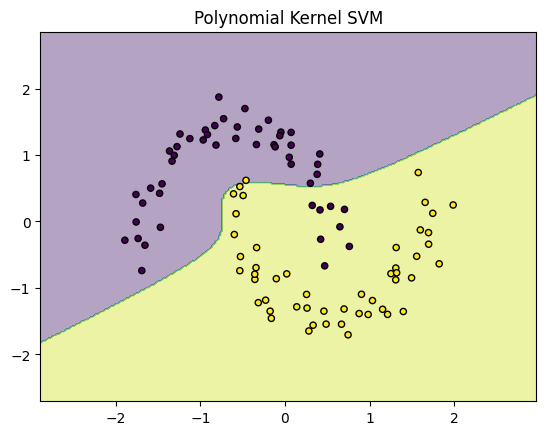

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset (only 2 classes for easy visualization)
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=42)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train model
model = SVC(kernel='poly', degree=3)
model.fit(X, y)

# Plot decision boundary
def plot_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    plt.title("Polynomial Kernel SVM")
    plt.show()

plot_boundary(model, X, y)


25. Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9736842105263158


27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually?

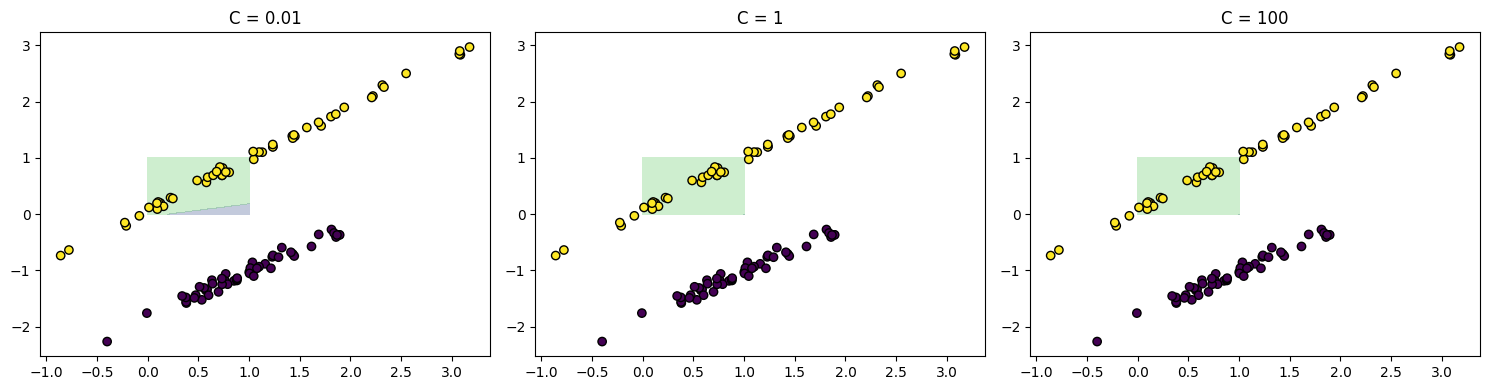

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Create a simple dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Try different C values
C_values = [0.01, 1, 100]

plt.figure(figsize=(15, 4))
for i, C in enumerate(C_values):
    model = SVC(C=C, kernel='linear')
    model.fit(X, y)

    # Plot decision boundary
    plt.subplot(1, 3, i+1)
    plt.title(f'C = {C}')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z > 0, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.tight_layout()
plt.show()


28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features?

In [7]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Binary features dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_binary = np.where(X > 0, 1, 0)  # Convert features to binary

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2)

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.77


29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data?

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Without Scaling
model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, model_unscaled.predict(X_test))

# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC()
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling:", acc_scaled)


Accuracy without scaling: 0.9555555555555556
Accuracy with scaling: 0.9333333333333333


30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing?

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normal Gaussian NB
model = GaussianNB()
model.fit(X_train, y_train)
pred_normal = model.predict(X_test)

# Add Laplace smoothing (simulate by adding small constant)
model_laplace = GaussianNB(var_smoothing=1e-9)
model_laplace.fit(X_train, y_train)
pred_laplace = model_laplace.predict(X_test)

print("Normal Accuracy:", accuracy_score(y_test, pred_normal))
print("Laplace Smoothing Accuracy:", accuracy_score(y_test, pred_laplace))


Normal Accuracy: 0.9649122807017544
Laplace Smoothing Accuracy: 0.9649122807017544


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)?

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 1.0


32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy?

In [11]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Without class_weight
model1 = SVC()
model1.fit(X_train, y_train)
print("Accuracy without class_weight:", accuracy_score(y_test, model1.predict(X_test)))

# With class_weight='balanced'
model2 = SVC(class_weight='balanced')
model2.fit(X_train, y_train)
print("Accuracy with class_weight='balanced':", accuracy_score(y_test, model2.predict(X_test)))


Accuracy without class_weight: 0.9466666666666667
Accuracy with class_weight='balanced': 0.9233333333333333


33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data?

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample data
emails = ["Free money now!!!", "Hi, how are you?", "Win prizes now", "Meeting tomorrow", "Limited offer!", "Lunch at 1 PM?"]
labels = [1, 0, 1, 0, 1, 0]  # 1=Spam, 0=Ham

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

predictions = model.predict(X_test_vec)
print("Spam Detection Accuracy:", accuracy_score(y_test, predictions))


Spam Detection Accuracy: 0.5


34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy?

In [13]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, svm.predict(X_test))

# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_nb = accuracy_score(y_test, nb.predict(X_test))

print("SVM Accuracy:", acc_svm)
print("Naïve Bayes Accuracy:", acc_nb)


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 0.9666666666666667


35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results?

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Without feature selection
model = GaussianNB()
model.fit(X_train, y_train)
acc_full = accuracy_score(y_test, model.predict(X_test))

# With feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

model_selected = GaussianNB()
model_selected.fit(X_train_selected, y_train)
acc_selected = accuracy_score(y_test, model_selected.predict(X_test_selected))

print("Accuracy without selection:", acc_full)
print("Accuracy with feature selection:", acc_selected)


Accuracy without selection: 0.916083916083916
Accuracy with feature selection: 0.8951048951048951


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy?

In [15]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# One-vs-Rest
ovr_model = OneVsRestClassifier(SVC())
ovr_model.fit(X_train, y_train)
acc_ovr = accuracy_score(y_test, ovr_model.predict(X_test))

# One-vs-One
ovo_model = OneVsOneClassifier(SVC())
ovo_model.fit(X_train, y_train)
acc_ovo = accuracy_score(y_test, ovo_model.predict(X_test))

print("OvR Accuracy:", acc_ovr)
print("OvO Accuracy:", acc_ovo)


OvR Accuracy: 0.7333333333333333
OvO Accuracy: 0.6888888888888889


37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy?

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Accuracy with {kernel} kernel:", acc)


Accuracy with linear kernel: 0.958041958041958
Accuracy with poly kernel: 0.916083916083916
Accuracy with rbf kernel: 0.9230769230769231


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy?

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_iris(return_X_y=True)
skf = StratifiedKFold(n_splits=5)
accuracies = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = SVC()
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

print("Average accuracy:", np.mean(accuracies))


Average accuracy: 0.9666666666666666


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance?

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# No prior
model1 = GaussianNB()
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

# Custom prior
model2 = GaussianNB(priors=[0.3, 0.7])
model2.fit(X_train, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test))

print("Default prior accuracy:", acc1)
print("Custom prior accuracy:", acc2)


Default prior accuracy: 0.9440559440559441
Custom prior accuracy: 0.9440559440559441


40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy?

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# With RFE
model = SVC(kernel='linear')
rfe = RFE(model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)
acc = accuracy_score(y_test, model.predict(X_test_rfe))
print("Accuracy with RFE:", acc)


Accuracy with RFE: 0.965034965034965


41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy?

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)?

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = GaussianNB()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, probs))


Log Loss: 0.6897036474672975


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn?

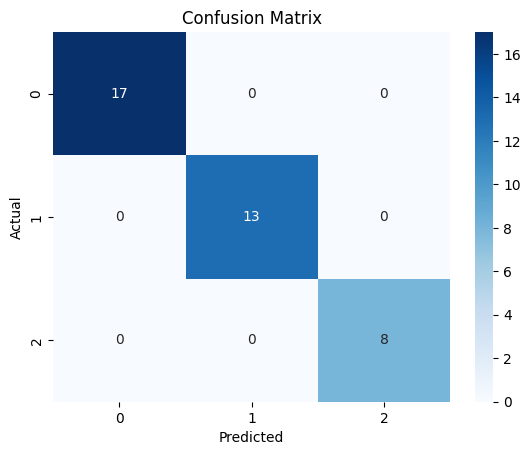

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE?

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 0.8615663626403236


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score?

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = GaussianNB()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, probs))


ROC-AUC Score: 0.9900793650793651


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve?

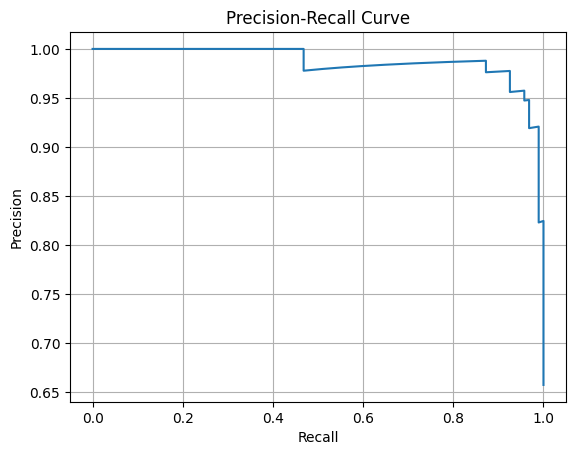

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC(probability=True)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, probs)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()
